
<div align="center">
  <p>

  <a href="https://github.com/pyresearch/pyresearch" style="text-decoration:none;">
      <img src="https://raw.githubusercontent.com/pyresearch/pyresearch/main/pyresearch.jpeg" width="100%" alt="" /></a>


  </p>
    

[English](README.md) | [简体中文](README.md)
</div>    
    
    


## Installation
You can  simply use pip to install the latest version of pyresearch.

## Installation
You can  simply use pip to install the latest version of pyresearch.

## <div align="center">`pip install pyresearch`</div>



<div align="center">
    <a href="https://github.com/pyresearch/pyresearch" style="text-decoration:none;">
      <img src="https://user-images.githubusercontent.com/34125851/226594737-c21e2dda-9cc6-42ef-b4e7-a685fea4a21d.png" width="2%" alt="" /></a>
    <img src="https://user-images.githubusercontent.com/34125851/226595799-160b0da3-c9e0-4562-8544-5f20460f7cc9.png" width="2%" alt="" />
      <a href="https://www.linkedin.com/company/pyresearch/" style="text-decoration:none;">
      <img src="https://user-images.githubusercontent.com/34125851/226596446-746ffdd0-a47e-4452-84e3-bf11ec2aa26a.png" width="2%" alt="" /></a>
    <img src="https://user-images.githubusercontent.com/34125851/226595799-160b0da3-c9e0-4562-8544-5f20460f7cc9.png" width="2%" alt="" />
    <a href="https://twitter.com/Noorkhokhar10" style="text-decoration:none;">
      <img src="https://user-images.githubusercontent.com/34125851/226599162-9b11194e-4998-440a-ba94-c8a5e1cdc676.png" width="2%" alt="" /></a>
    <img src="https://user-images.githubusercontent.com/34125851/226595799-160b0da3-c9e0-4562-8544-5f20460f7cc9.png" width="2%" alt="" />    
    <a href="https://www.youtube.com/@Pyresearch" style="text-decoration:none;">
      <img src="https://user-images.githubusercontent.com/34125851/226599904-7d5cc5c0-89d2-4d1e-891e-19bee1951744.png" width="2%" alt="" /></a>
    <img src="https://user-images.githubusercontent.com/34125851/226595799-160b0da3-c9e0-4562-8544-5f20460f7cc9.png" width="2%" alt="" />
    <a href="https://www.facebook.com/Pyresearch" style="text-decoration:none;">
      <img src="https://user-images.githubusercontent.com/34125851/226600380-a87a9142-e8e0-4ec9-bf2c-dd6e9da2f05a.png" width="2%" alt="" /></a>
    <img src="https://user-images.githubusercontent.com/34125851/226595799-160b0da3-c9e0-4562-8544-5f20460f7cc9.png" width="2%" alt="" />
    <a href="https://www.instagram.com/pyresearch/" style="text-decoration:none;">  
      <img src="https://user-images.githubusercontent.com/34125851/226601355-ffe0b597-9840-4e10-bbef-43d6c74b5a9e.png" width="2%" alt="" /></a>      
  </div>



<hr>


In [14]:
# Downloading Necessary libraries
!pip install tensor-dash


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [2]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [ ]:
!ls

In [ ]:
# Reading the Training Data
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/plant/train.csv')

In [ ]:
# Importing Necessary Libraries
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensordash.tensordash import Tensordash
import plotly.express as px
import json
import skimage.io as io
#user_secrets = UserSecretsClient()
#secret_value_0 = user_secrets.get_secret("email")
#secret_value_1 = user_secrets.get_secret("pin")

In [ ]:
dataset

# Data Exploration and Visualisation

## Data Exploration

In [1]:
# Checking if there are any null values in the dataset
dataset.isnull().any()

NameError: name 'dataset' is not defined

In [ ]:
# Checking the column data type
dataset.dtypes

In [ ]:
# Adding .jpg extension to every image_id
dataset['image_id'] = dataset['image_id']+'.jpg'

In [ ]:
dataset

## Data Visualisation

## Classes Distribution

In [3]:
dataset.healthy.hist()
plt.title('Healthy Classes')

NameError: name 'dataset' is not defined

In [4]:
dataset.multiple_diseases.hist()
plt.title('Multiple Diseases Classes')

NameError: name 'dataset' is not defined

In [5]:
dataset.rust.hist()
plt.title('Rust Classes')

NameError: name 'dataset' is not defined

In [6]:
dataset.scab.hist()
plt.title('Scab Classes')

NameError: name 'dataset' is not defined

## Class Image Visualisation

In [7]:
w=10
h=10
fig=plt.figure(figsize=(20, 14))
columns = 4
rows = 4
plt.title('Image Class')
plt.axis('off')
for i in range(1, columns*rows +1):
    img = plt.imread(f'/content/drive/MyDrive/Colab Notebooks/plant/images/Train_{i}.jpg')
    fig.add_subplot(rows, columns, i)

    if dataset.healthy[i] == 1:
        plt.title('Healthy')
    elif dataset.multiple_diseases[i] == 1:
        plt.title('Multiple Disease')
    elif dataset.rust[i] == 1:
        plt.title('Rust')
    else:
        plt.title('Scab')
    plt.imshow(img)
    plt.axis('off')
plt.show()

NameError: name 'plt' is not defined

# Image Segmentation

Multiple Histogram for different pixles intensity values

In [8]:
w=10
h=10
fig=plt.figure(figsize=(20, 14))
columns = 4
rows = 4
plt.axis('off')
for i in range(1, columns*rows +1):
    img = plt.imread(f'/content/drive/MyDrive/Colab Notebooks/plant/images/Train_{i}.jpg')
    fig.add_subplot(rows, columns, i)
    plt.hist(img.ravel(), bins=32, range=[0, 256])
plt.show()

NameError: name 'plt' is not defined

In [9]:
img.shape

NameError: name 'img' is not defined

# Making Training Data

## Reading data from Keras Generators

In [10]:
datagen = keras.preprocessing.image.ImageDataGenerator(
        rescale=1./255,
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=180,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.15, # Randomly zoom image
        width_shift_range=0.15,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.15,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True)  # randomly flip images

NameError: name 'keras' is not defined

In [11]:
X_train, X_valid = train_test_split(dataset, test_size=0.05, shuffle=False)

NameError: name 'train_test_split' is not defined

## Making a Tensorflow Dataset

In [12]:
BATCH_SIZE = 8

train_generator = datagen.flow_from_dataframe(dataset,
                    directory='/content/drive/MyDrive/Colab Notebooks/plant/images/',
                    x_col='image_id',
                    y_col=['healthy', 'multiple_diseases', 'rust', 'scab'] ,
                    target_size=(512, 512),
                    class_mode='raw',
                    batch_size=BATCH_SIZE, shuffle=False)

valid_generator = datagen.flow_from_dataframe(X_valid,
                    directory='/content/drive/MyDrive/Colab Notebooks/plant/images/',
                    x_col='image_id',
                    y_col=['healthy', 'multiple_diseases', 'rust', 'scab'] ,
                    target_size=(512, 512),
                    class_mode='raw',
                    batch_size=BATCH_SIZE, shuffle=False)

NameError: name 'datagen' is not defined

## Generator Images Visualisations

In [13]:
w=10
h=10
fig=plt.figure(figsize=(20, 14))
columns = 2
rows = 4
plt.title('Image Class')
plt.axis('off')
for i in range(1, columns*rows):

    img_batch, label_batch = train_generator.next()
    fig.add_subplot(rows, columns, i)

    if label_batch[i][0] == 1:
        plt.title('Healthy')
    elif label_batch[i][1] == 1:
        plt.title('Multiple Disease')
    elif label_batch[i][2] == 1:
        plt.title('Rust')
    else:
        plt.title('Scab')

    plt.imshow(img_batch[i])
    plt.axis('off')
plt.show()

NameError: name 'plt' is not defined

# Making The Models

## Xception Model

In [ ]:

xception_model = tf.keras.models.Sequential([
  tf.keras.applications.xception.Xception(include_top=False, weights='imagenet', input_shape=(512, 512, 3)),
   tf.keras.layers.GlobalAveragePooling2D(),
   tf.keras.layers.Dense(4,activation='softmax')
])
xception_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
xception_model.summary()

83683744/83683744 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 16, 16, 2048)      20861480  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 4)                 8196      
                                                                 
Total params: 20869676 (79.61 MB)
Trainable params: 20815148 (79.40 MB)
Non-trainable params: 54528 (213.00 KB)
_________________________________________________________________


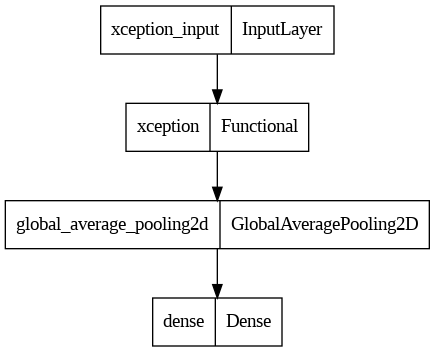

In [ ]:
tf.keras.utils.plot_model(xception_model, to_file='xception_model.png')

## DenseNet121

In [ ]:

densenet_model = tf.keras.models.Sequential([
    tf.keras.applications.densenet.DenseNet121(include_top=False, weights='imagenet',input_shape=(512, 512, 3)),
   tf.keras.layers.GlobalAveragePooling2D(),
   tf.keras.layers.Dense(4,activation='softmax')
])
densenet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
densenet_model.summary()

29084464/29084464 [==============================] - 0s 0us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 16, 16, 1024)      7037504   
                                                                 
 global_average_pooling2d_1  (None, 1024)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_1 (Dense)             (None, 4)                 4100      
                                                                 
Total params: 7041604 (26.86 MB)
Trainable params: 6957956 (26.54 MB)
Non-trainable params: 83648 (326.75 KB)
_________________________________________________________________


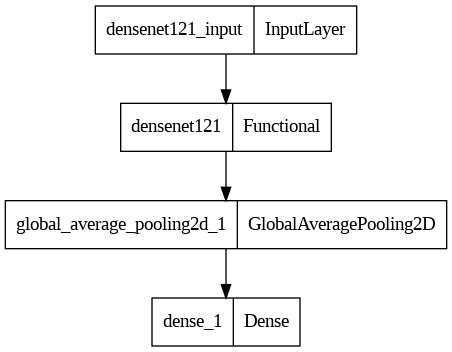

In [ ]:
tf.keras.utils.plot_model(densenet_model, to_file='densenet_model.png')

# Ensembling the Models

In [ ]:
inputs = tf.keras.Input(shape=(512, 512, 3))

xception_output = xception_model(inputs)
densenet_output = densenet_model(inputs)

outputs = tf.keras.layers.average([densenet_output, xception_output])


model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 512, 512, 3)]        0         []                            
                                                                                                  
 sequential_1 (Sequential)   (None, 4)                    7041604   ['input_3[0][0]']             
                                                                                                  
 sequential (Sequential)     (None, 4)                    2086967   ['input_3[0][0]']             
                                                          6                                       
                                                                                                  
 average (Average)           (None, 4)                    0         ['sequential_1[0][0]',    

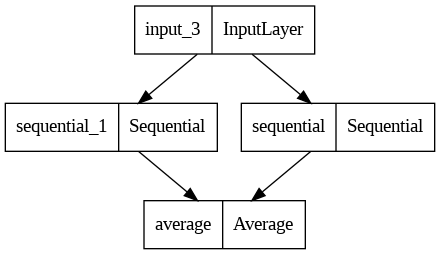

In [ ]:
tf.keras.utils.plot_model(model, to_file='model.png')

## Setting the hyperparameters & Callbacks

Learning rate schedule: 1e-05 to 0.0001 to 1e-05


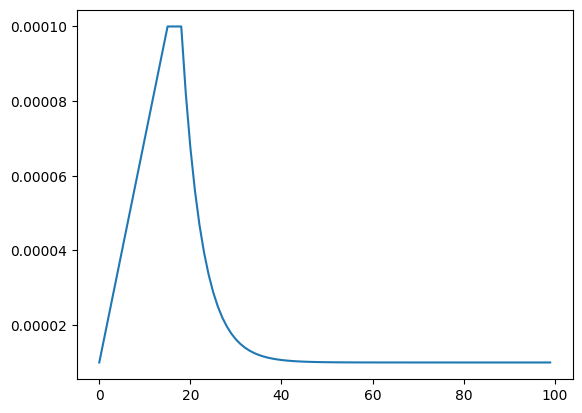

In [ ]:
LR_START = 0.00001
LR_MAX = 0.0001
LR_MIN = 0.00001
LR_RAMPUP_EPOCHS = 15
LR_SUSTAIN_EPOCHS = 3
LR_EXP_DECAY = .8
EPOCHS = 100

def lrfn(epoch):
    if epoch < LR_RAMPUP_EPOCHS:
        lr = (LR_MAX - LR_START) / LR_RAMPUP_EPOCHS * epoch + LR_START
    elif epoch < LR_RAMPUP_EPOCHS + LR_SUSTAIN_EPOCHS:
        lr = LR_MAX
    else:
        lr = (LR_MAX - LR_MIN) * LR_EXP_DECAY**(epoch - LR_RAMPUP_EPOCHS - LR_SUSTAIN_EPOCHS) + LR_MIN
    return lr

lr_callback = tf.keras.callbacks.LearningRateScheduler(lrfn, verbose=True)

rng = [i for i in range(EPOCHS)]
y = [lrfn(x) for x in rng]
plt.plot(rng, y)
print("Learning rate schedule: {:.3g} to {:.3g} to {:.3g}".format(y[0], max(y), y[-1]))

In [ ]:
model_checkpoint = tf.keras.callbacks.ModelCheckpoint('model.h5', monitor='val_accuracy', verbose=2, save_best_only=True)

# Tensordash is used for getting live model training status, like accuracy or loss, in your phone, sure to checkout here: https://github.com/CleanPegasus/TensorDash
#histories = Tensordash(
   # email = secret_value_0,
   # password = secret_value_1,
#    ModelName = "Plant Disease Model")

# Training the Model

In [ ]:
# Model training
model_history = model.fit_generator(train_generator, epochs=EPOCHS, validation_data=valid_generator, callbacks=[model_checkpoint,lr_callback])

<ipython-input-31-8cac81a2f163>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_history = model.fit_generator(train_generator, epochs=EPOCHS, validation_data=valid_generator, callbacks=[model_checkpoint,lr_callback])



Epoch 1: LearningRateScheduler setting learning rate to 1e-05.
Epoch 1/100
228/228 [==============================] - ETA: 0s - loss: 1.0301 - accuracy: 0.6398
Epoch 1: val_accuracy improved from -inf to 0.83696, saving model to model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


228/228 [==============================] - 1103s 4s/step - loss: 1.0301 - accuracy: 0.6398 - val_loss: 0.5921 - val_accuracy: 0.8370 - lr: 1.0000e-05

Epoch 2: LearningRateScheduler setting learning rate to 1.6000000000000003e-05.
Epoch 2/100
228/228 [==============================] - ETA: 0s - loss: 0.4619 - accuracy: 0.8677
Epoch 2: val_accuracy improved from 0.83696 to 0.94565, saving model to model.h5
228/228 [==============================] - 252s 1s/step - loss: 0.4619 - accuracy: 0.8677 - val_loss: 0.2034 - val_accuracy: 0.9457 - lr: 1.6000e-05

Epoch 3: LearningRateScheduler setting learning rate to 2.2e-05.
Epoch 3/100
228/228 [==============================] - ETA: 0s - loss: 0.2918 - accuracy: 0.9094
Epoch 3: val_accuracy improved from 0.94565 to 0.96739, saving model to model.h5
228/228 [==============================] - 254s 1s/step - loss: 0.2918 - accuracy: 0.9094 - val_loss: 0.1355 - val_accuracy: 0.9674 - lr: 2.2000e-05

Epoch 4: LearningRateScheduler setting learning 

UnknownError: ignored

### Saving History

In [ ]:
# Saving model history
pd.DataFrame(model_history.history).to_csv('ModelHistory.csv')

### Model History Visualisation

In [ ]:
plt.plot(pd.DataFrame(model_history.history)['accuracy'])
plt.title("accuracy Plot")

In [ ]:
plt.plot(pd.DataFrame(model_history.history)['loss'])
plt.title("Loss Plot")

In [ ]:
plt.plot(pd.DataFrame(model_history.history)['val_accuracy'])
plt.title("Validation Accuracy Plot")

In [ ]:
plt.plot(pd.DataFrame(model_history.history)['val_loss'])
plt.title("Validation Accuracy Plot")

# Predicting Classes

In [ ]:
# Reading testing and submission data
test_dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/plant/test.csv')
submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/plant/sample_submission.csv')
test_dataset

In [ ]:
# Adding .jpg extension to image_id
test_dataset['image_id'] = test_dataset['image_id']+'.jpg'

In [ ]:
test_gen = datagen.flow_from_dataframe(test_dataset,
                    directory='/content/drive/MyDrive/Colab Notebooks/plant/images/',
                    x_col='image_id',
                    target_size=(512, 512),
                    class_mode=None,
                    shuffle=False,
                    batch_size=8)

In [ ]:
# Predicting class
predictions = model.predict_generator(test_gen)

In [ ]:
submission['healthy'] = predictions[:, 0]
submission['multiple_diseases'] = predictions[:, 1]
submission['rust'] = predictions[:, 2]
submission['scab'] = predictions[:, 3]

In [ ]:
submission

In [ ]:
submission.to_csv('submission.csv', index=False)